# Monte Carlo integration

In [1]:
import matplotlib.pyplot as plt

import numpy as np

Because we're going to work with a function that has poles at the boundaries of the domain $[0, 2]$, we have two options: slightly shift the domain to $[0 + \epsilon, 2 - \epsilon]$ for a small value of $\epsilon$, or simply ignore divide by zero and invalid value errors. These `NaN` values are ignored by NumPy in all calculations, and we can leave the domain intact. Note that the following statement is completely unnecessary, but if left out, warnings will be generated. The semicolon at the end of the statement suppresses the (useless and distracting) output from the `seterr()` function.

In [2]:
np.seterr(divide='ignore', invalid='ignore');

We define our function $f(x) = \sin^2\left[\frac{1}{x(2-x)}\right]$ using the short-hand `lambda`-notation:

In [3]:
f = lambda x: np.sin(1 / (x * (2 - x))) ** 2

Now, we create a sample of 1000 linearly spaced values on the domain $[0, 2]$ and plot our function. (Again, the semicolon in the final plot statement suppresses distracting output).

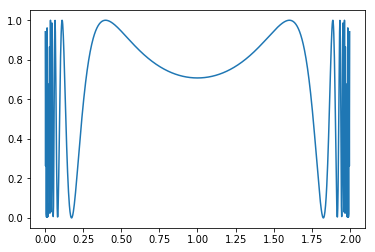

In [4]:
x = np.linspace(0, 2, 1000)
plt.plot(x, f(x));

Monte Carlo integration is actually the name for a large number of different algorithms. We pick the following one: when evaluating $\int_a^b f(x)\,\mathrm{d}x$ where we know that in the domain $[a, b]$ the range of the function $f(x)$ is within $[0, y_\mathrm{max}]$, we generate random $(x, y)$ pairs with $x \in [a, b]$ and $y \in [0, y_\mathrm{max}]$. For each $(x, y)$ pair we determine whether the point lies under the curve by checking if $y \leq f(x)$. Then, the integral is given by the fraction of points lying under the curve multiplied by the area of the rectangle on which the $(x, y)$ pairs were sampled.

In [5]:
def integrate(f, a, b, N, ymax):
    """Perform a numerical integration using a Monte Carlo method.

    :param f: function for which to calculate the integral
    :param a: start of the interval on the x-axis
    :param b: end of the interval
    :param N: number of points to estimate the integral
    :param ymax: boundary which encloses function. Choose this as low as
        possible, but make sure it is always larger than the value of
        the function.

    :returns: estimate of the integral of the function on [a, b]

    """
    x = np.linspace(a, b, N)
    y = np.random.uniform(0, ymax, N)

    y_f = f(x)
    fraction = (y <= y_f).sum() / N

    total_area = ymax * (b - a)
    return fraction * total_area

We test the algorithm with the function $f(x) = x$ which should give us $\int_0^{10} x\,\mathrm{d}x = \left. \frac{1}{2}x^2 \right\rvert_0^{10} = 50$. We estimate the integral using 100000 function evaluations, expecting the function to always be smaller than the value 10:

In [6]:
integrate(lambda x: x, 0, 10, 100000, 10)

49.925000000000004

Finally, we estimate $\int_0^2 \sin^2\left[\frac{1}{x(2-x)}\right]\mathrm{d}x$, for which we expect the function to always be smaller than 2:

In [7]:
integrate(f, 0, 2, 10000000, 2)

1.4511556